In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df =pd.read_csv(r"C:\Users\saksh\Downloads\archive\Coffe_sales.csv")

In [3]:
df.head(12)
 

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,2024-03-01,15:39:47.726000
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000


----- FIRST 5 ROWS OF DATA -----
   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  

----- DATASET INFORMATION -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns)

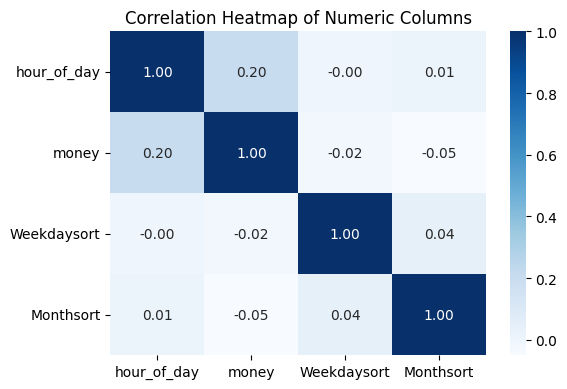

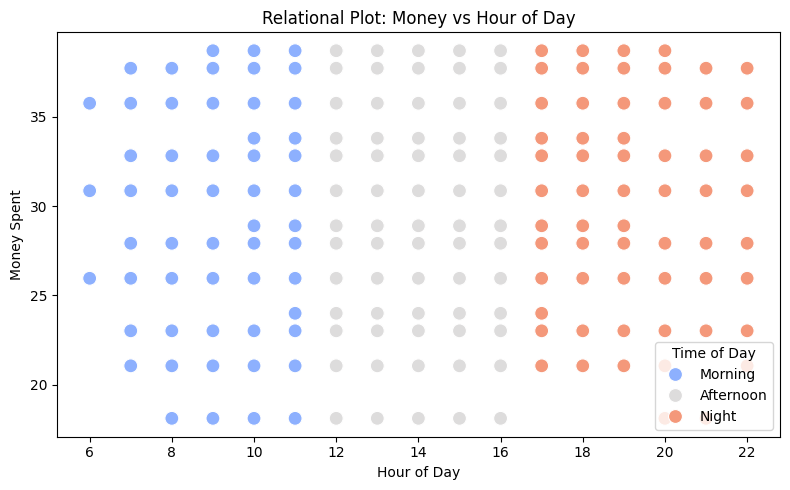

C:\Users\saksh\AppData\Local\Temp\ipykernel_33656\1667224506.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


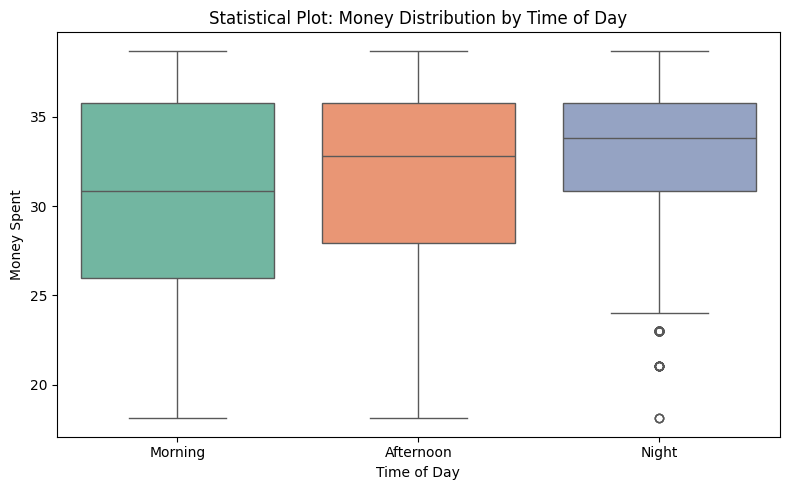

C:\Users\saksh\AppData\Local\Temp\ipykernel_33656\1667224506.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


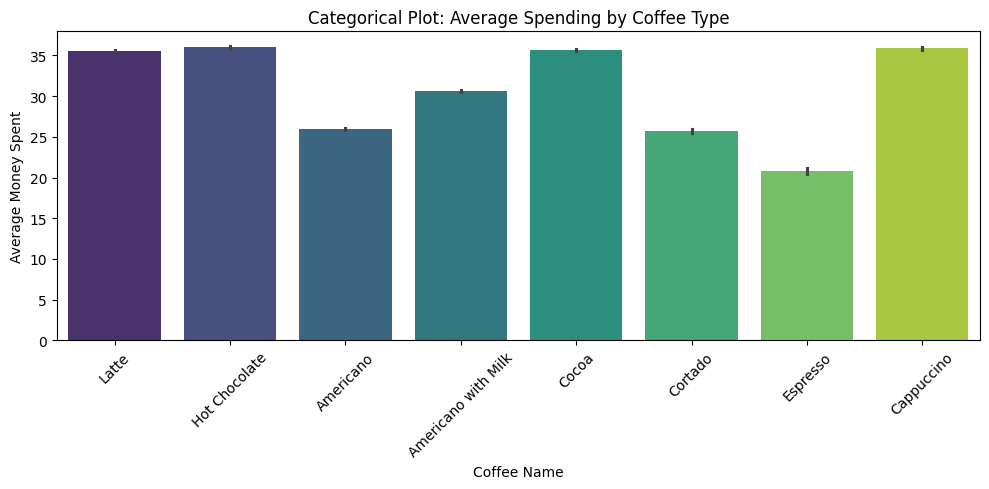


For the attribute 'money':
Mean = 31.65, Standard Deviation = 4.88, Skewness = -0.54, and Excess Kurtosis = -0.67.
The data is left-skewed and platykurtic.


In [ ]:
"""
Statistics and Trends Assignment
--------------------------------
This file analyzes the coffee sales dataset and demonstrates:
- Data preprocessing and exploration
- Computation of four statistical moments
- Visualization using relational, categorical, and statistical plots
The code follows the provided template and PEP-8 conventions.
"""

from corner import corner  # type: ignore # keep as per template, though not used here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss # type: ignore
import seaborn as sns


def plot_relational_plot(df):
    """Scatter plot showing relationship between hour_of_day and money."""
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(
        data=df,
        x="hour_of_day",
        y="money",
        hue="Time_of_Day",
        s=100,
        palette="coolwarm",
        ax=ax
    )
    ax.set_title("Relational Plot: Money vs Hour of Day")
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Money Spent")
    plt.legend(title="Time of Day")
    plt.tight_layout()
    plt.savefig("relational_plot.png")
    plt.show()
    return


def plot_categorical_plot(df):
    """Bar plot showing average money spent by coffee type."""
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(
        data=df,
        x="coffee_name",
        y="money",
        estimator=np.mean,
        palette="viridis",
        ax=ax
    )
    ax.set_title("Categorical Plot: Average Spending by Coffee Type")
    ax.set_xlabel("Coffee Name")
    ax.set_ylabel("Average Money Spent")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("categorical_plot.png")
    plt.show()
    return


def plot_statistical_plot(df):
    """Box plot showing distribution of money across times of day."""
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.boxplot(
        data=df,
        x="Time_of_Day",
        y="money",
        palette="Set2",
        ax=ax
    )
    ax.set_title("Statistical Plot: Money Distribution by Time of Day")
    ax.set_xlabel("Time of Day")
    ax.set_ylabel("Money Spent")
    plt.tight_layout()
    plt.savefig("statistical_plot.png")
    plt.show()
    return


def statistical_analysis(df, col: str):
    """Calculate the four statistical moments for the given column."""
    mean = df[col].mean()
    stddev = df[col].std()
    skew = df[col].skew()
    excess_kurtosis = df[col].kurtosis()
    return mean, stddev, skew, excess_kurtosis


def preprocessing(df):
    """
    Preprocess the dataset:
    - Display info, summary, and missing values
    - Fill missing numeric values with mean
    - Display correlations
    """
    print("----- FIRST 5 ROWS OF DATA -----")
    print(df.head())

    print("\n----- DATASET INFORMATION -----")
    print(df.info())

    print("\n----- DESCRIPTIVE STATISTICS -----")
    print(df.describe())

    print("\n----- CHECKING MISSING VALUES -----")
    print(df.isnull().sum())

    # Fill numeric missing values with mean
    df.fillna(df.mean(numeric_only=True), inplace=True)

    print("\n----- CORRELATION HEATMAP -----")
    plt.figure(figsize=(6, 4))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Columns")
    plt.tight_layout()
    plt.savefig("correlation_heatmap.png")
    plt.show()

    return df


def writing(moments, col):
    """Display interpretation of the four moments."""
    print(f"\nFor the attribute '{col}':")
    print(f"Mean = {moments[0]:.2f}, "
          f"Standard Deviation = {moments[1]:.2f}, "
          f"Skewness = {moments[2]:.2f}, and "
          f"Excess Kurtosis = {moments[3]:.2f}.")

    # Interpret skewness and kurtosis
    skew_text = ("right-skewed" if moments[2] > 0 else
                 "left-skewed" if moments[2] < 0 else
                 "symmetrical")
    kurt_text = ("leptokurtic" if moments[3] > 0 else
                 "platykurtic" if moments[3] < 0 else
                 "mesokurtic")

    print(f"The data is {skew_text} and {kurt_text}.")
    return


def main():
    """Main workflow of the analysis."""
    # Load dataset
    df = pd.read_csv(r"data.csv")

    # Preprocess
    df = preprocessing(df)

    # Choose column for analysis
    col = "money"

    # Plots
    plot_relational_plot(df)
    plot_statistical_plot(df)
    plot_categorical_plot(df)

    # Statistical analysis
    moments = statistical_analysis(df, col)

    # Write interpretation
    writing(moments, col)
    return


if __name__ == "__main__":
    main()